## Linear Regression with Python Scikit Learn

In [8]:
# Importing necessary library for the task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Getting data from url provided in the question
url = "http://bit.ly/w-data"
s_df= pd.read_csv(url)
print("Data frame created")
s_df.tail(10)

Data frame created


,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


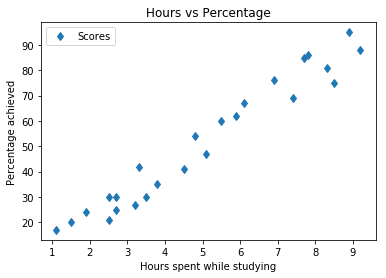

In [46]:
# Plotting the scrores data distribution
s_df.plot(x='Hours', y='Scores', style='d')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours spent while studying')  
plt.ylabel('Percentage achieved')  
plt.show()

## Preparing the data for linear regression

Now we will divide the data into "attributes" and "labels".

In [13]:
X = s_df.iloc[:, :-1].values  
Y = s_df.iloc[:, 1].values

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Since we have our attributes and labels ready, the next step is to split the data into training and test sets.

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                            test_size=0.2, random_state=0)

## Training the linear regression model using training dataset

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training done.")

Training done.


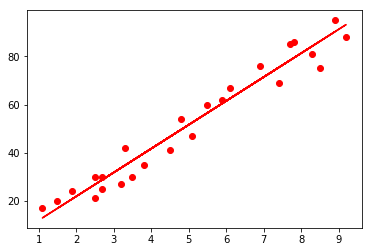

In [49]:
# Plotting the linear regression model
line = regressor.coef_*X+regressor.intercept_

# Plotting using the test data
plt.scatter(X, Y,color='red')
plt.plot(X, line,color='red');
plt.show()

## Making Predictions

After training the algorithm,lets make some prediction.

In [76]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [57]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [79]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the regression model

To find out the performance of the model we have used mean absolute error.

In [82]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
